# Loan System Predictor

Goal: 
Try to predict whether an individual is approvaled for a loan or not 

# Feature Description:

1. Loan_ID: loan id
2. Gender: male or female
3. Married: yes or no
4. Dependents: number of dependents
5. Education: graduate or not
6. Self_Emplyed: yes or no
7. ApplicantIncome: applicant income by month 
8. Coapplicantincome: Cosigners income by month
9. LoanAmount: the size of the loan
10. Loan_Amount_Term: the duration of the loan
11. Credit_History: 1 indicates yes and 0 indicates no
12. Property_Area: Urabn, Rural, Semiurban
13. Loan_Status: yes or no

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# look at the first 5 rows of our dataset
loan = pd.read_csv('loan.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Observe we have both categorical and numeric variables, thus we might want to label encode our categorical vriables for our modeling.

In [3]:
# dimensions of our data
loan.shape
# we have a total of 614 observations

(614, 13)

In [4]:
# dataset feature data types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# check for missing values
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Statistical Summary
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observe the scales of our mean and standard deviations between our variables are on different scales. We will normalize our data to prevent weighting a feature more over another. 

In [7]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Visualizations

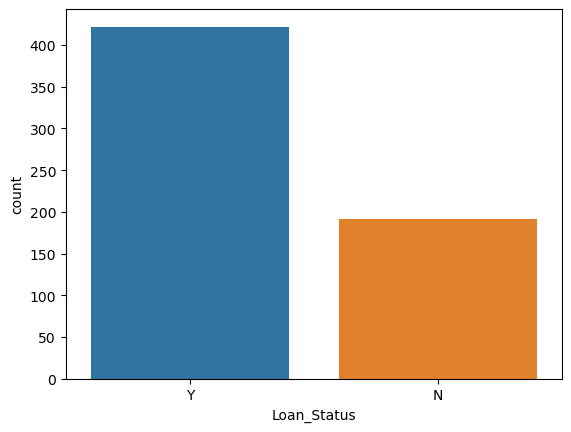

In [8]:
# check the distribution of loan approval 
sns.countplot(x = 'Loan_Status', data = loan)
plt.show()

The distribution on our target variable loan status we can clearly see a class imbalance, where we had more loan approvals than loan denials.

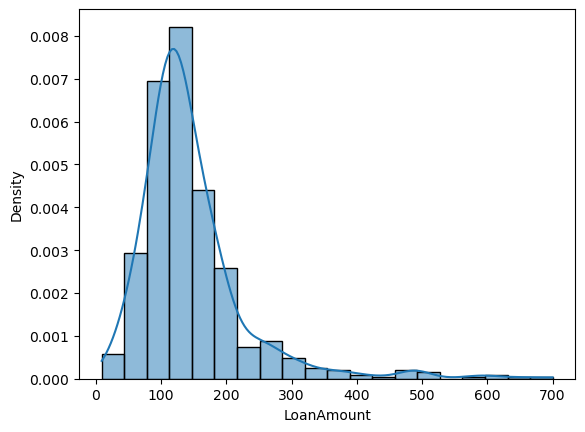

In [9]:
# histogram on Loan Amount
sns.histplot(x = 'LoanAmount', data = loan, bins = 20, kde = True, stat = 'density', alpha = .5)
plt.show()

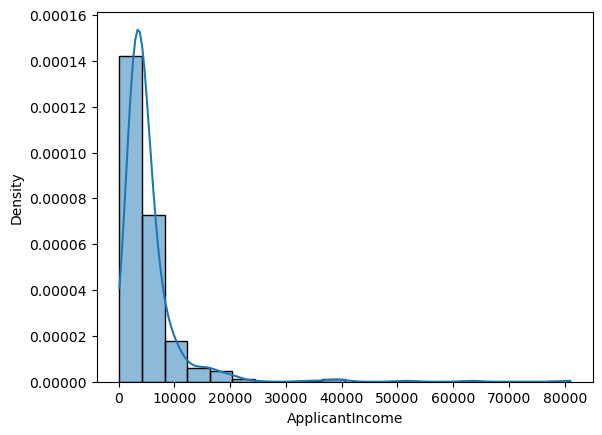

In [10]:
# Histogram on Applicant Income
sns.histplot(x = 'ApplicantIncome', data = loan, bins = 20, kde = True, stat = 'density', alpha = .5)
plt.show()

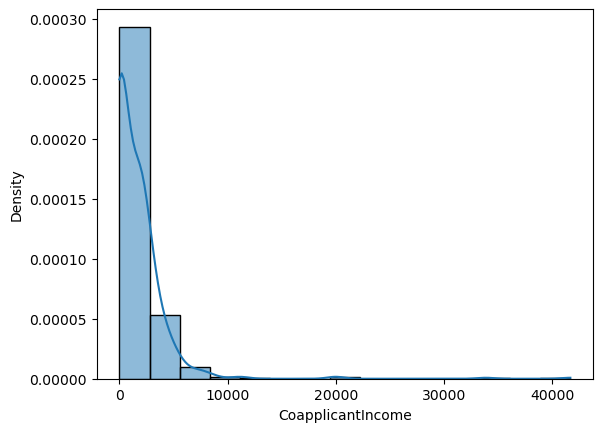

In [11]:
# histogram on co applicant income
sns.histplot(x = 'CoapplicantIncome', data = loan, bins = 15, kde = True, stat = 'density', alpha = .5)
plt.show()

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


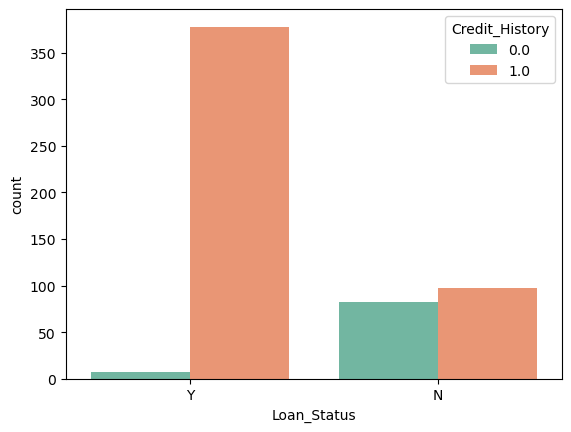

In [12]:
# Check loan status by credit history 
sns.countplot(x = 'Loan_Status', data = loan, hue = 'Credit_History', palette = 'Set2')
print(pd.crosstab(index = loan['Credit_History'], columns = loan['Loan_Status']))
plt.show()

More people with a Credit History were more likely to be approved for a loan.

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


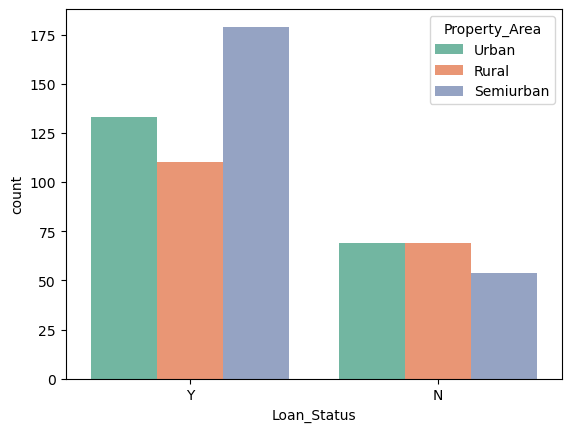

In [13]:
# check loan status by property area
sns.countplot(x = 'Loan_Status', data = loan, hue = 'Property_Area', palette = 'Set2')
print(pd.crosstab(index = loan['Property_Area'], columns = loan['Loan_Status']))
plt.show()

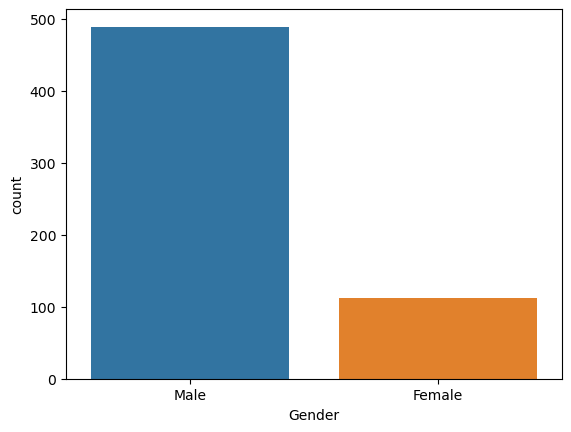

In [14]:
# check the distribution on Gender
sns.countplot(x = 'Gender', data = loan)
plt.show()

As we can see in our loan dataset we have a majorit of males compared to females who applied for a loan.

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


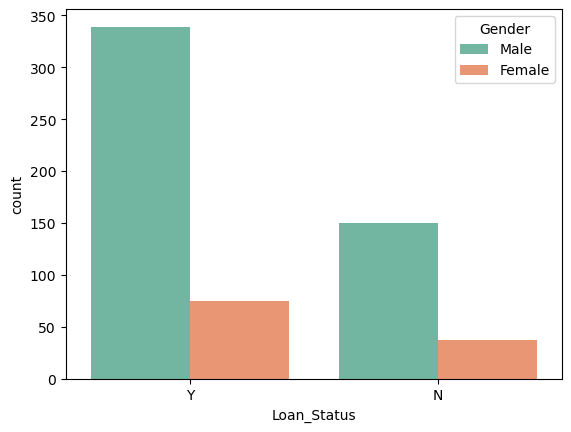

In [15]:
# check loan status by gender
sns.countplot(x = 'Loan_Status', data = loan, hue = 'Gender', palette = 'Set2')
print(pd.crosstab(index = loan['Gender'], columns = loan['Loan_Status']))
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


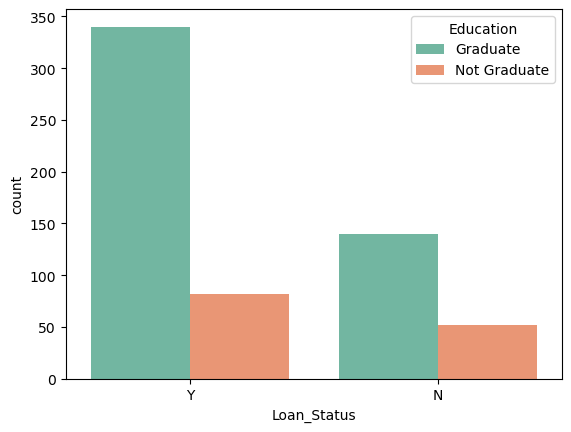

In [16]:
# check loan status by education
sns.countplot(x = 'Loan_Status', data = loan, hue = 'Education', palette = 'Set2')
print(pd.crosstab(index = loan['Education'], columns = loan['Loan_Status']))
plt.show()

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


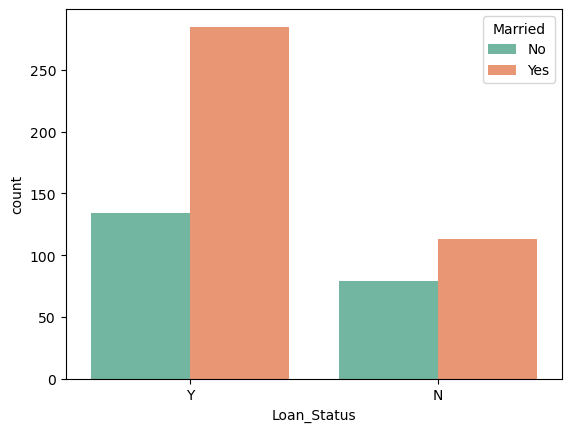

In [17]:
# check loan status by married
sns.countplot(x = 'Loan_Status', data = loan, hue = 'Married', palette = 'Set2')
print(pd.crosstab(index = loan['Married'], columns = loan['Loan_Status']))
plt.show()

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


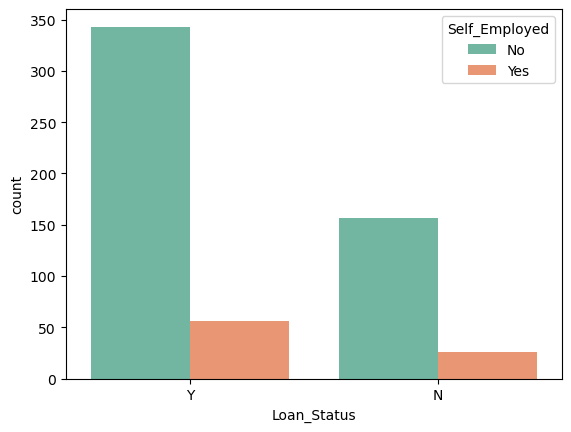

In [18]:
# check loan status whether they are self employed 
sns.countplot(x = 'Loan_Status', data = loan, hue = 'Self_Employed', palette = 'Set2')
print(pd.crosstab(index = loan['Self_Employed'], columns = loan['Loan_Status']))
plt.show()

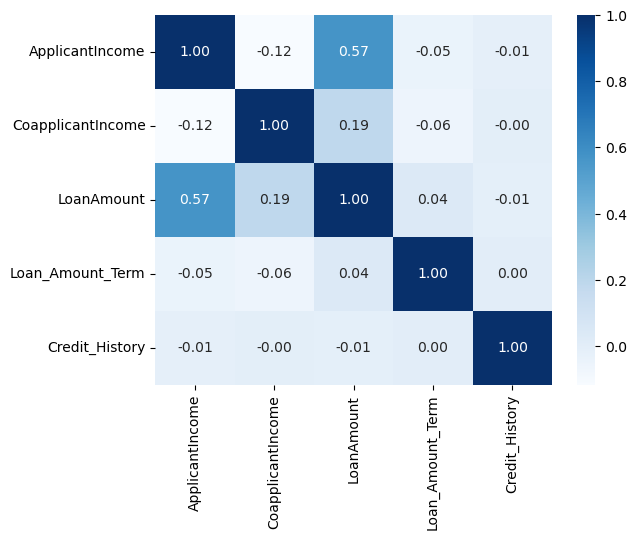

In [19]:
# correlation matrix
corr = loan.corr(numeric_only = True)
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'Blues')
plt.show()

From th correlation matrix between the numeric variables, we can see Loan Amount is highly correlated with ApplicantIncome with a score of 0.57. Co Applicant Income has a minor correlation with Loan Amount as well with a score of 0.19.

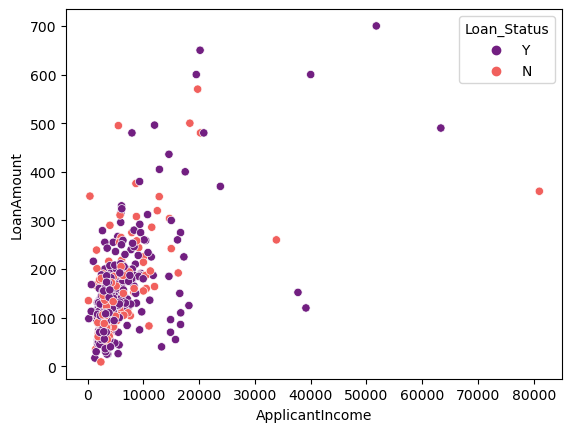

In [20]:
# check the correlation between Applicant income and loan amount 
sns.scatterplot(x = 'ApplicantIncome', y ='LoanAmount', data = loan, hue = 'Loan_Status', palette = 'magma')
plt.show()

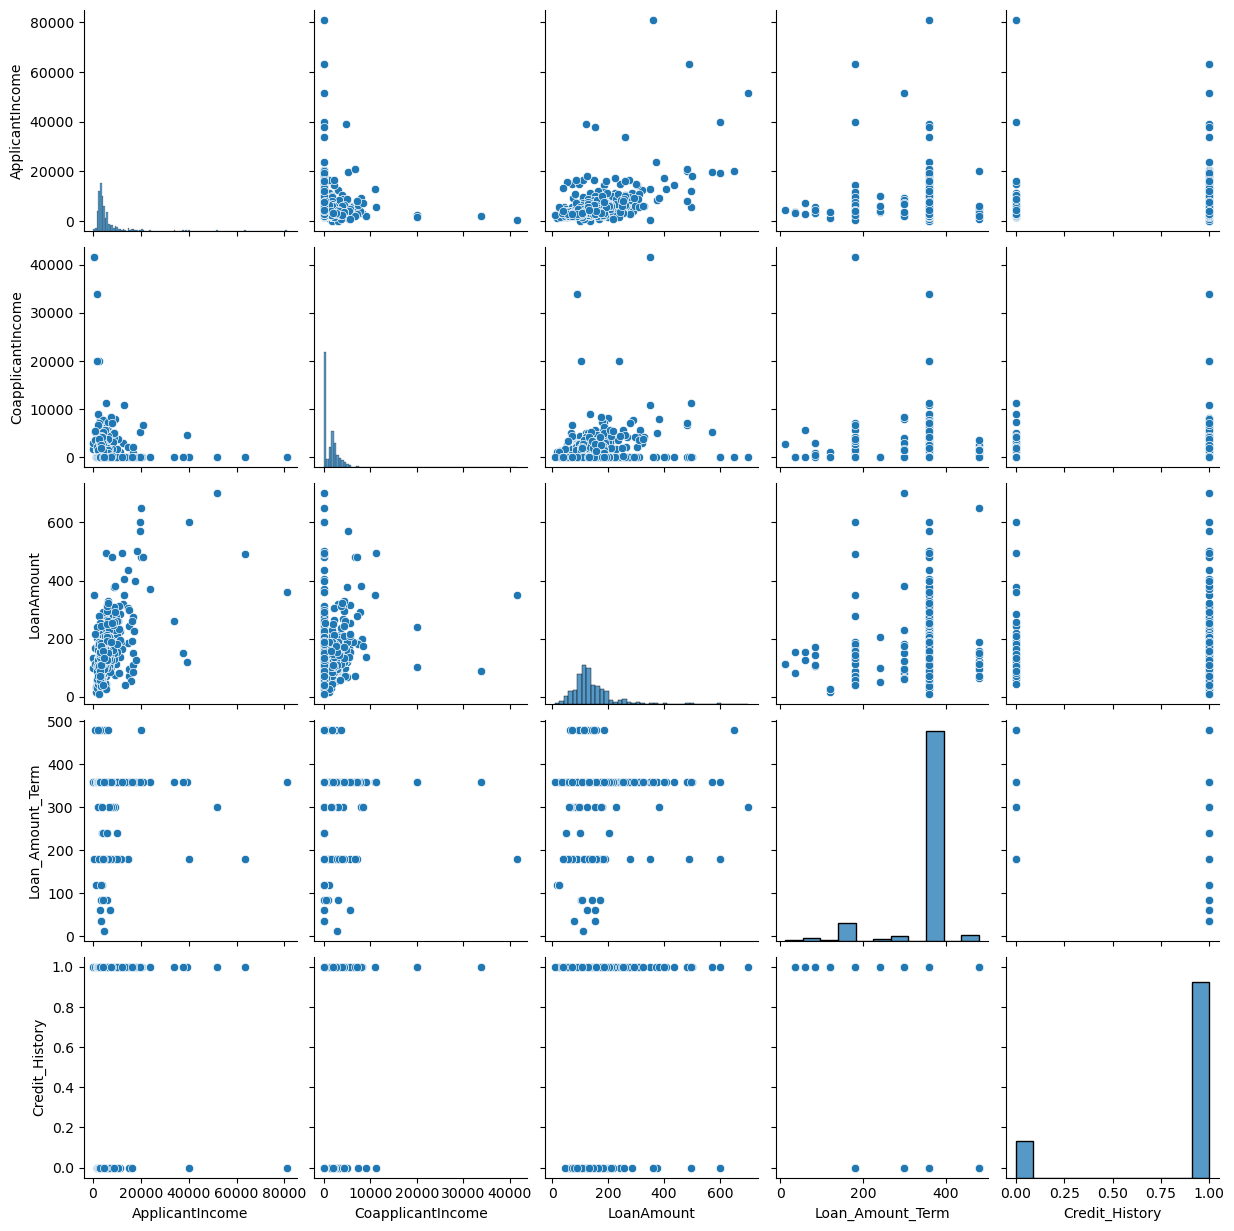

In [21]:
# all scatter plots
sns.pairplot(loan)

## Feature Engineering

In [22]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
# combine our features that were correlated with loan amount
loan['TotalIncome'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']

# since the values are too spread out with decrease the gaps with log function
loan['TotalIncome_log'] = np.log(loan['TotalIncome'])
loan['LoanAmount_log'] = np.log(loan['LoanAmount'])

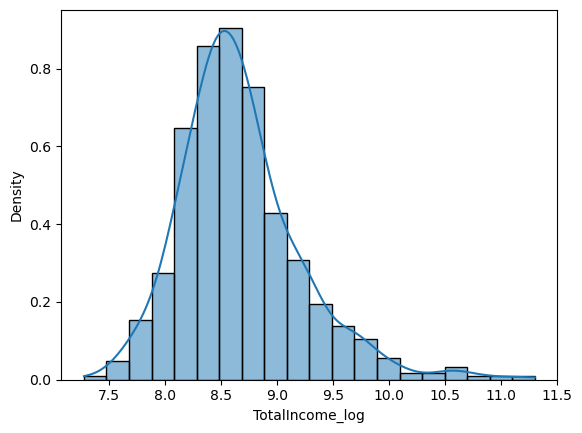

In [24]:
# observe now we have a normal distribution based off Applicant Income and Co applicant income
sns.histplot(x = 'TotalIncome_log', data = loan, bins = 20, kde = True, stat = 'density', alpha = .5)
plt.show()

Observe how after we feature engineer TotalIncome_log now the histogram seems to fit a normal distribution. 

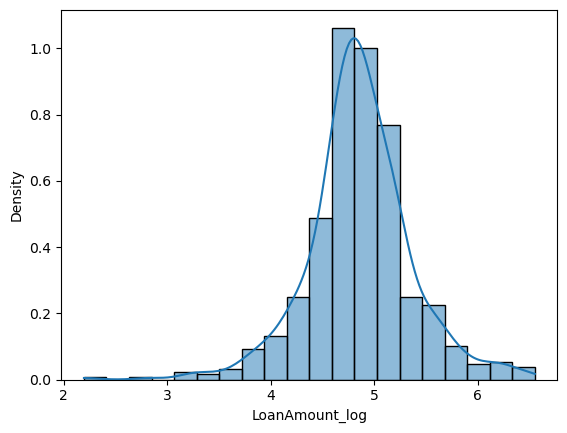

In [25]:
# normal distribution on Loan Amount
sns.histplot(x = 'LoanAmount_log', data = loan, bins = 20, kde = True, stat = 'density', alpha = .5)
plt.show()

## Fill the missing values 

In [26]:
# Fill the missing values 
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace = True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace = True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace = True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace = True)

loan.LoanAmount = loan.LoanAmount.fillna(loan.LoanAmount.mean())
loan.LoanAmount_log = loan.LoanAmount_log.fillna(loan.LoanAmount_log.mean())

loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace = True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace = True)

loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
LoanAmount_log       0
dtype: int64

## Label Encoder

In [27]:
# import label encoder and imputer methods
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [28]:
# label encode our categorical variables
le = LabelEncoder()

categorical = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status','Dependents']

for cat in categorical:
    loan[cat] = le.fit_transform(loan[cat])

In [29]:
# observe the encoded data
loan.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026,4.857444
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.714568,4.852030
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368,4.189655
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,8.505323,4.787492
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515,4.948760
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1,9613.0,9.170872,5.587249


## Select Features

In [30]:
# all columns of dataframe
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'TotalIncome_log', 'LoanAmount_log'],
      dtype='object')

In [31]:
# our predictors 
X = loan.drop(['Loan_ID', 'Loan_Status','LoanAmount','TotalIncome','ApplicantIncome','CoapplicantIncome'], axis = 1 )

# our target variable
y = loan['Loan_Status']

# our predictor dataframe
X

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome_log,LoanAmount_log
0,1,0,0,0,0,360.0,1.0,2,8.674026,4.857444
1,1,1,1,0,0,360.0,1.0,0,8.714568,4.852030
2,1,1,0,0,1,360.0,1.0,2,8.006368,4.189655
3,1,1,0,1,0,360.0,1.0,2,8.505323,4.787492
4,1,0,0,0,0,360.0,1.0,2,8.699515,4.948760
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,360.0,1.0,0,7.972466,4.262680
610,1,1,3,0,0,180.0,1.0,0,8.320205,3.688879
611,1,1,1,0,0,360.0,1.0,2,9.025456,5.533389
612,1,1,2,0,0,360.0,1.0,2,8.933664,5.231109


In [32]:
# import train test split
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [33]:
# split our data into training and testing sets

# since our target variable had class imbalances 
# we want to split the data so there is an even number of loan approvals and loan denials in our training and testing 
# sets, we use stratification on our target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

## Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [35]:
# create a pipeline with Gausian Naive bayes model
pipe_nb = Pipeline([
                    ('scaler',StandardScaler()),
                    ('GaussianNB',GaussianNB())])

pipe_nb.fit(X_train,y_train)

# cross validation 10-folds
tr_sc = cross_val_score(pipe_nb, X_train,y_train, cv =10)
te_sc = cross_val_score(pipe_nb, X_test,y_test, cv =10)

print("Gassian Naive Baye's mean scores:")
print(f"Training mean accuracy {tr_sc.mean()} with standard deviation of {tr_sc.std()}.")
print(f"Testing mean accuracy {te_sc.mean()} with standard deviation of {te_sc.std()}.")

Gassian Naive Baye's mean scores:
Training mean accuracy 0.7800408163265306 with standard deviation of 0.03132208304531127.
Testing mean accuracy 0.8288461538461538 with standard deviation of 0.09187263931140432.


## XGBoost

In [37]:
import xgboost as xgb

In [38]:
# pipeline with XGBClassifier 
pipe_xgb = Pipeline([
                    ('scaler',StandardScaler()),
                    ('xgb',xgb.XGBClassifier(objective='binary:logistic', 
                                            eval_metric='rmse'))])

pipe_xgb.fit(X_train,y_train)

tr_sc = cross_val_score(pipe_xgb, X_train,y_train, cv =10)
te_sc = cross_val_score(pipe_xgb, X_test,y_test, cv =10)

print("XGBoost mean scores:")
print(f"Training mean accuracy {tr_sc.mean()} with standard deviation of {tr_sc.std()}.")
print(f"Testing mean accuracy {te_sc.mean()} with standard deviation of {te_sc.std()}.")

XGBoost mean scores:
Training mean accuracy 0.7353061224489796 with standard deviation of 0.039192707291956376.
Testing mean accuracy 0.8121794871794872 with standard deviation of 0.07514231511849713.


In [39]:
# Define the hyperparameters to search over
hyperparameters = {
    'xgb__max_depth': [3, 4, 5],
    'xgb__learning_rate': [0.1, 0.01, 0.001],
    'xgb__n_estimators': [100,200,300],
    'xgb__gamma': [0, 0.05 ,0.1],
    'xgb__subsample': [0.5,0.75,1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator = pipe_xgb, 
                           param_grid = hyperparameters, 
                           cv=10,
                           refit = 'rmse')

In [40]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='rmse',
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__gamma': [0, 0.05, 0.1],
                         'xgb__learning_rate': [0.1, 0.01, 0.001],
                         'xgb__max_depth': [3, 4, 5],
                         'xgb__n_estimators': [100, 200, 300],
                         'xgb__subsample': [0.5, 0.75, 1.0]},
             refit='rmse')

In [41]:
# print the model parameters with the best score
print(grid_search.best_params_)

# print the model best score
print(grid_search.best_score_)

{'xgb__gamma': 0, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.5}
0.7984081632653062


In [42]:
# create pipeline with XGBoost Best parameters
pipe_xgb2 = Pipeline([
                    ('scaler',StandardScaler()),
                    ('xgb',xgb.XGBClassifier(gamma = 0, learning_rate = 0.01, max_depth = 3,
                                             n_estimators = 100, subsample = 0.5,
                                             objective='binary:logistic', 
                                            eval_metric='rmse'))])

pipe_xgb2.fit(X_train,y_train)

tr_sc = cross_val_score(pipe_xgb2, X_train,y_train, cv =10)
te_sc = cross_val_score(pipe_xgb2, X_test,y_test, cv =10)

print("XGBoost mean scores:")
print(f"Training mean accuracy {tr_sc.mean()} with standard deviation of {tr_sc.std()}.")
print(f"Testing mean accuracy {te_sc.mean()} with standard deviation of {te_sc.std()}.")

XGBoost mean scores:
Training mean accuracy 0.7984081632653062 with standard deviation of 0.030584722321504703.
Testing mean accuracy 0.8532051282051283 with standard deviation of 0.08054762027614411.


## ADA Boost

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
# create a pipeline with ADA Boost 
pipe_ada = Pipeline([
                  ('scaler', StandardScaler()) ,
                  ('ada', AdaBoostClassifier(n_estimators=10, random_state=42))])

pipe_ada.fit(X_train,y_train)


tr_sc = cross_val_score(pipe_ada, X_train,y_train, cv =10)
te_sc = cross_val_score(pipe_ada, X_test,y_test, cv =10)

print("Gassian Naive Baye's mean scores:")
print(f"Training mean accuracy {tr_sc.mean()} with standard deviation of {tr_sc.std()}.")
print(f"Testing mean accuracy {te_sc.mean()} with standard deviation of {te_sc.std()}.")

Gassian Naive Baye's mean scores:
Training mean accuracy 0.788204081632653 with standard deviation of 0.03425871142675113.
Testing mean accuracy 0.7788461538461539 with standard deviation of 0.11931517552730295.


In [45]:
# grid search for optimal number of n_estimators
tr_mean = [] 
te_mean = []
for i in range(1,50):
    pipe_nb = Pipeline([
                    ('scaler',StandardScaler()),
                    ('ada', AdaBoostClassifier(n_estimators=i, random_state=42))])

    pipe_nb.fit(X_train,y_train)
    
    tr_sc = cross_val_score(pipe_nb, X_train,y_train, cv =10)
    te_sc = cross_val_score(pipe_nb, X_test,y_test, cv =10)
    
    tr_mean.append(tr_sc.mean())
    te_mean.append(te_sc.mean())
x = range(1,50)

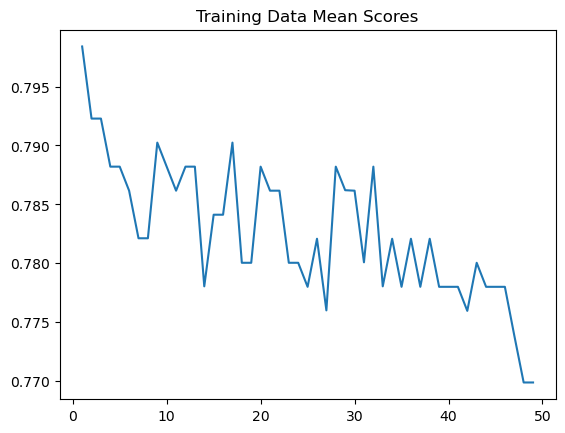

In [46]:
# plot training data accuracy scores
plt.plot(x,tr_mean)
plt.title('Training Data Mean Scores')
plt.show()

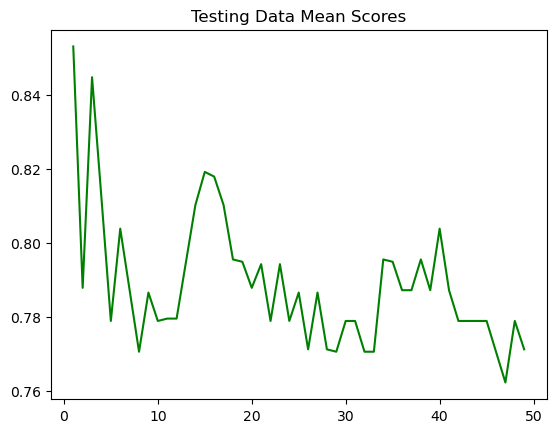

In [47]:
# plot testing data accuracy scores
plt.plot(x,te_mean, color = 'green')
plt.title('Testing Data Mean Scores')
plt.show()

In [48]:
# first 10 scores on training data
tr_mean[:10]

[0.7984081632653062,
 0.7922857142857143,
 0.7922857142857143,
 0.7882040816326531,
 0.7882040816326531,
 0.7861632653061223,
 0.7821224489795918,
 0.7821224489795917,
 0.7902448979591836,
 0.788204081632653]

In [49]:
# first 10 scores on testing data
te_mean[:10]

[0.8532051282051283,
 0.7878205128205129,
 0.8448717948717949,
 0.8121794871794872,
 0.778846153846154,
 0.8038461538461539,
 0.7871794871794872,
 0.7705128205128206,
 0.7865384615384615,
 0.7788461538461539]

In [50]:
# create pipeline with ADA Boost best n estimators 
pipe_ada2 = Pipeline([
                  ('scaler', StandardScaler()) ,
                  ('ada', AdaBoostClassifier(n_estimators=1, random_state=42))])

pipe_ada2.fit(X_train,y_train)


tr_sc = cross_val_score(pipe_ada2, X_train,y_train, cv =10)
te_sc = cross_val_score(pipe_ada2, X_test,y_test, cv =10)

print("Gassian Naive Baye's mean scores:")
print(f"Training mean accuracy {tr_sc.mean()} with standard deviation of {tr_sc.std()}.")
print(f"Testing mean accuracy {te_sc.mean()} with standard deviation of {te_sc.std()}.")

Gassian Naive Baye's mean scores:
Training mean accuracy 0.7984081632653062 with standard deviation of 0.030584722321504703.
Testing mean accuracy 0.8532051282051283 with standard deviation of 0.08054762027614411.


## Random Forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
# create pipeline with RandomForest Classifier
pipe_rf = Pipeline([
                  ('scaler', StandardScaler()) ,
                  ('rf', RandomForestClassifier(random_state = 0))])

pipe_rf.fit(X_train,y_train)


tr_sc = cross_val_score(pipe_rf, X_train,y_train, cv =10)
te_sc = cross_val_score(pipe_rf, X_test,y_test, cv =10)

print("Gassian Naive Baye's mean scores:")
print(f"Training mean accuracy {tr_sc.mean()} with standard deviation of {tr_sc.std()}.")
print(f"Testing mean accuracy {te_sc.mean()} with standard deviation of {te_sc.std()}.")

Gassian Naive Baye's mean scores:
Training mean accuracy 0.7618367346938775 with standard deviation of 0.03427174156484533.
Testing mean accuracy 0.8442307692307691 with standard deviation of 0.059931612351962066.
